In [58]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing import image
%matplotlib inline

In [22]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('seg_train/seg_train',
                                                 target_size = (150,150),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 14034 images belonging to 6 classes.


In [23]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('seg_test/seg_test',
                                            target_size = (150,150),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 3000 images belonging to 6 classes.


In [49]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),  
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [50]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [52]:
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
es = EarlyStopping(monitor='val_accuracy',mode='max',patience=20,verbose=1,restore_best_weights=True)
rl = ReduceLROnPlateau(monitor='val_accuracy',mode='max',patience=20,factor=0.1,min_lr=1e-3,verbose=1)
mc = ModelCheckpoint('gg.h5',monitor='val_accuracy',mode='max',verbose=1,save_best_only=True)
history = model.fit(x=training_set, 
                    validation_data=test_set,
                    batch_size=128,
                    epochs=20,
                    callbacks=[es,mc,rl])

Epoch 1/20
439/439 [==============================] - ETA: 0s - loss: 1.0964 - accuracy: 0.5760
Epoch 1: val_accuracy improved from -inf to 0.69133, saving model to gg.h5
439/439 [==============================] - 398s 906ms/step - loss: 1.0964 - accuracy: 0.5760 - val_loss: 0.8434 - val_accuracy: 0.6913 - lr: 0.0010
Epoch 2/20
439/439 [==============================] - ETA: 0s - loss: 0.8752 - accuracy: 0.6780
Epoch 2: val_accuracy improved from 0.69133 to 0.73467, saving model to gg.h5
439/439 [==============================] - 325s 740ms/step - loss: 0.8752 - accuracy: 0.6780 - val_loss: 0.7371 - val_accuracy: 0.7347 - lr: 0.0010
Epoch 3/20
439/439 [==============================] - ETA: 0s - loss: 0.8028 - accuracy: 0.7067
Epoch 3: val_accuracy improved from 0.73467 to 0.76067, saving model to gg.h5
439/439 [==============================] - 404s 919ms/step - loss: 0.8028 - accuracy: 0.7067 - val_loss: 0.6509 - val_accuracy: 0.7607 - lr: 0.0010
Epoch 4/20
439/439 [=================

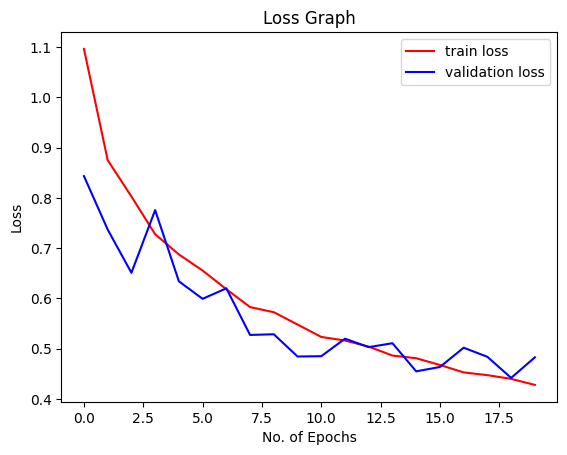

In [53]:
plt.plot(history.history['loss'],'r',label='train loss')
plt.plot(history.history['val_loss'],'b',label='validation loss')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.title('Loss Graph')
plt.legend();

In [64]:
class_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [66]:
def preprocess_image(img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(150, 150))  # Adjust target size to match your model's input size
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize to [0, 1] range
    return img_array

In [68]:
def make_prediction(img_path):
    img_array = preprocess_image(img_path)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)  # Assuming sparse categorical output
    predicted_class_name = class_names[predicted_class[0]]  # Get the class name
    return predicted_class_name, predictions

In [72]:
img_path = 'seg_test/seg_test/mountain/20282.jpg'  # Replace with the path to your image
# Or using raw string literal
# img_path = r'seg_test\seg_test\forest\20299.jpg'
predicted_class_name, predictions = make_prediction(img_path)

1/1 [==============================] - 0s 54ms/step


In [73]:
print(f"Predicted class: {predicted_class_name}")

Predicted class: mountain


In [74]:
import joblib
model.save('modelcn.h5')

In [75]:
additional_data = {'class_names': ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']}
joblib.dump(additional_data, 'additional_data.pkl')

['additional_data.pkl']